In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
def enhance_natural_image(img_path):
    """
    Enhance a slightly blurry image in a natural and realistic way.
    Steps:
    1. Denoise gently
    2. Subtle sharpening (unsharp mask)
    3. Local contrast enhancement (CLAHE)
    4. Tone rebalance for natural colors
    """

    # --- Load image ---
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Step 1: Gentle denoising ---
    denoised = cv2.fastNlMeansDenoisingColored(img, None, 3, 3, 7, 21)

    # --- Step 2: Mild unsharp masking (soft sharpening) ---
    blur = cv2.GaussianBlur(denoised, (7, 7), 13)
    sharpened = cv2.addWeighted(denoised, 1.3, blur, -0.3, 0)

    # --- Step 3: Local contrast enhancement (CLAHE on L-channel) ---
    lab = cv2.cvtColor(sharpened, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    lab_enhanced = cv2.merge((cl, a, b))
    enhanced = cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2RGB)

    # --- Step 4: Gentle tone balancing ---
    enhanced = np.clip(enhanced * 1.02, 0, 255).astype(np.uint8)

    return enhanced


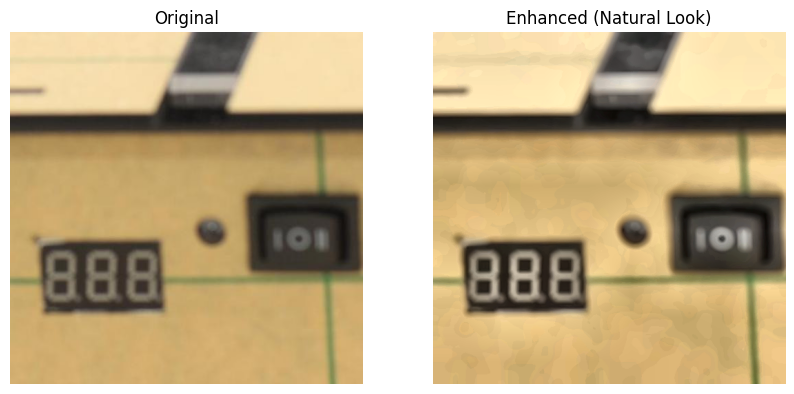

In [21]:
img_path = "assets/gambar3.jpg"
enhanced = enhance_natural_image(img_path)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(enhanced)
plt.title("Enhanced (Natural Look)")
plt.axis("off")
plt.show()